In [2]:
import numpy as np
import matplotlib.pyplot as plt 
np.random.seed(42)

Gradient descent minimizes the **Mean Squared Error(MSE)** which serves as the loss function to find the best-fit line. It is used to iteratively update the coefficients (weights) and bias by computing the gradient of the MSE with respect to these parameters. 

Important note is since **MSE** is a convex function gradient descent guarantees convergence to the global minimum if the learning rate is appropriately chosen. At each iteration: 
- Calculate the gradient of the loss function with respect to the weights and bias.
- Update the weights and bias iteratively to minimize the error fuction and maximize the likelihood of the correct classification.

<p><strong>Update rules:</strong></p>
<pre>
w = w - α · ∂MSE/∂w
b = b - α · ∂MSE/∂b
</pre>

<p>Where:</p>
<ul>
  <li><strong>α : </strong>learning rate</li>
  <li><strong>∂MSE/∂w =</strong> -2/n · Xᵀ · (y - ŷ)</li>
  <li><strong>∂MSE/∂b =</strong> -2/n · Σ(y - ŷ)</li>
</ul>

<p>So after canceling the negative sign, the update becomes:</p>
<pre>
w = w + α · (1/n) · Xᵀ · (y - ŷ)
b = b + α · (1/n) · Σ(y - ŷ)
</pre>

In [3]:
def J(theta):
    return theta ** 2
def grad_J(theta):
    return 2 * theta

def gradient_descent(start_theta, learn_rate, num_iter):
    theta = start_theta
    history = [(theta, J(theta))]

    for _ in range(num_iter):
        grad = grad_J(theta)
        theta -= learn_rate * grad
        history.append((theta, J(theta)))

    return history

In [4]:
import pandas as pd

def gradient_descent_df(start_theta, learn_rate, num_iter):
    theta = start_theta
    records = []
    
    for i in range(num_iter + 1):
        loss = J(theta)
        records.append({'iteration': i, 'theta': theta, 'loss': loss})
        grad = grad_J(theta)
        theta -=learn_rate * grad

    return pd.DataFrame(records)


,iteration,theta,loss
0,0,4.000000,16.000000
1,1,3.200000,10.240000
2,2,2.560000,6.553600
3,3,2.048000,4.194304
4,4,1.638400,2.684355
5,5,1.310720,1.717987
6,6,1.048576,1.099512
7,7,0.838861,0.703687
8,8,0.671089,0.450360
9,9,0.536871,0.288230


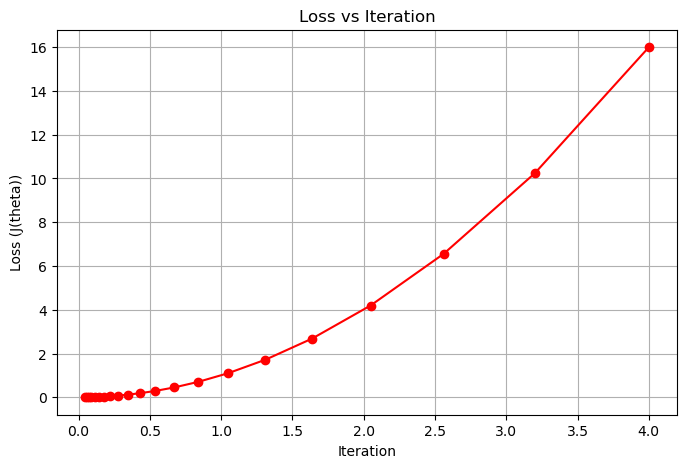

In [5]:
df_history = gradient_descent_df(start_theta=4.0, learn_rate=0.1, num_iter=20)
display(df_history)

plt.figure(figsize=(8, 5))
#plt.plot(df_history['iteration'], df_history['loss'], marker='o')
plt.plot(df_history['theta'], df_history['loss'], marker='o', color='red')
plt.title("Loss vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss (J(theta))")
plt.grid(True)
plt.show()

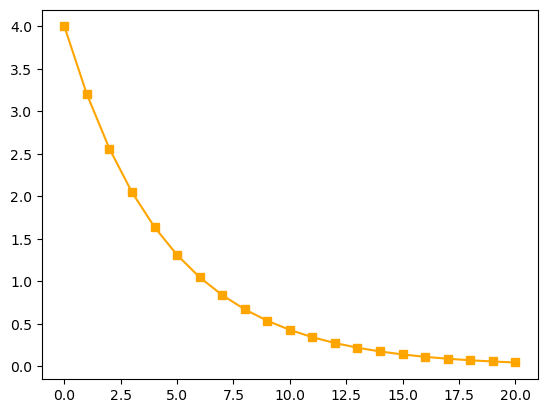

In [6]:
plt.plot(df_history['iteration'], df_history['theta'], marker='s', color='orange')


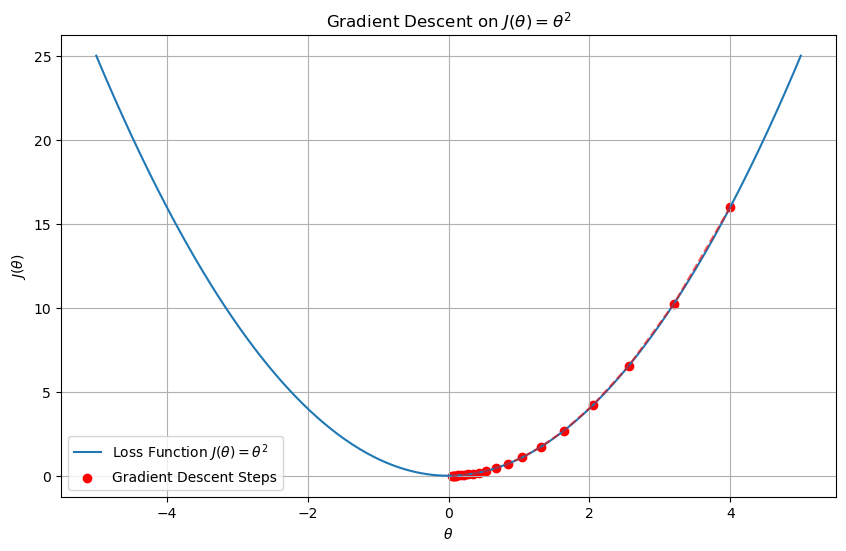

In [7]:
start_theta = 4.0
learn_rate = 0.1
num_iter = 20
history = gradient_descent(start_theta, learn_rate, num_iter)

thetas, losses = zip(*history)
theta_range = np.linspace(-5, 5, 400)
loss_range= J(theta_range)

plt.figure(figsize=(10, 6))
plt.plot(theta_range, loss_range, label='Loss Function $J(\\theta) = \\theta^2$')
plt.scatter(thetas, losses, color='red', label='Gradient Descent Steps')
plt.plot(thetas, losses, color='red', linestyle='--', alpha=0.6)
plt.title("Gradient Descent on $J(\\theta) = \\theta^2$")
plt.xlabel("$\\theta$")
plt.ylabel("$J(\\theta)$")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Gradient Descent step for linear regression, following a squared error rule. 
def MSEStep(X, y, W, b, learn_rate = 0.1):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """

    # compute errors
    y_pred = np.matmul(X, W) + b 
    error = y - y_pred

    # compute steps
    W_new = W + learn_rate * np.matmul(error, X) / X.shape[0]
    b_new = b + learn_rate * error.sum() / X.shape[0]

    return W_new, b_new

In [15]:
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.1, num_iter = 25):

    n_points = X.shape[0]
    W = np.zeros(X.shape[1])
    b = 0 
    regression_coef = [np.hstack((W, b))]

    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W, b)))

    return regression_coef

In [16]:
data = np.loadtxt('data.csv', delimiter = ',')
X = data[:,:-1]
y = data[:, -1]

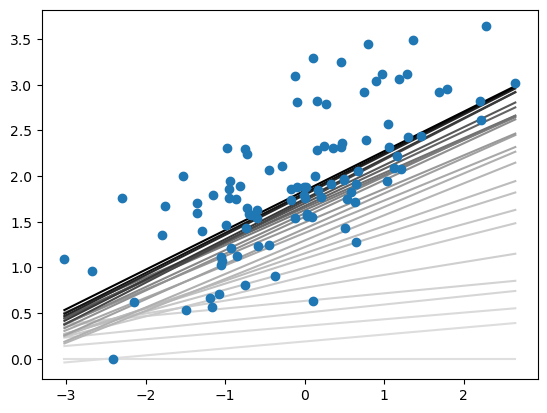

In [17]:
regression_coef = miniBatchGD(X, y)

# Plot the regression coefficient
plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()

In [18]:
def plot_regression_lines(X, y, regression_coef):
    """
    Plot regression lines from each iteration of mini-batch gradient descent
    along with the original data points.
    """
    X = X.flatten()  # ensure 1D for plotting
    X_min, X_max = X.min(), X.max()

    plt.figure(figsize=(8, 5))

    total_steps = len(regression_coef)
    for i, (W, b) in enumerate(regression_coef):
        # W is expected to be an array (e.g., array([w1])), so extract scalar
        w_scalar = W[0] if isinstance(W, (np.ndarray, list)) else W

        # Fading color: newer lines are darker
        fade_factor = 0.92 ** (total_steps - i - 1)
        color = [1 - fade_factor] * 3

        # Two endpoints to draw line: (X_min, y1), (X_max, y2)
        y1 = w_scalar * X_min + b
        y2 = w_scalar * X_max + b
        plt.plot([X_min, X_max], [y1, y2], color=color)

    # Plot data points
    plt.scatter(X, y, zorder=3, edgecolor='k')
    plt.title("Gradient Descent Path of Regression Lines")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()


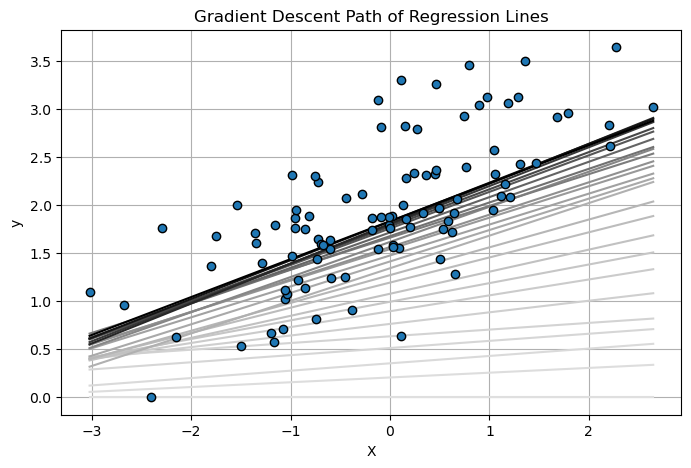

In [19]:
regression_coef = miniBatchGD(X, y)
plot_regression_lines(X, y, regression_coef)
